## AuxTel test LTS-337-016 Tracking errors

In this notebook, we gather tracking errors in AZ and EL from EFD for each of the tracking tests. 


In [1]:
import sys, time, os, asyncio

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lsst.ts import salobj
from lsst.ts.observatory.control.auxtel.atcs import ATCS
from lsst.ts.observatory.control.auxtel.latiss import LATISS
from astropy.time import Time, TimeDelta
from astropy.coordinates import AltAz, ICRS, EarthLocation, Angle, FK5
import astropy.units as u
from lsst_efd_client import EfdClient

In [2]:
# Set Cerro Pachon location
location = EarthLocation.from_geodetic(lon=-70.747698*u.deg,
                                       lat=-30.244728*u.deg,
                                       height=2663.0*u.m)

In [3]:
# for tab completion to work in current notebook instance
%config IPCompleter.use_jedi = False

In [4]:
import logging
stream_handler = logging.StreamHandler(sys.stdout)
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [6]:
firstExpIds = [[2021090700360,33, 0.59], [2021090700400, 33, 0.69], [2021090700454, 33, 0.46], [2021090700493, 33, 0.43], [2021090700534, 33, 0.76], [2021090700573, 33, 0.66], [2021090800263, 33, 0.41], [2021090800324, 33, 1.03]]


In [7]:
# Recover posData dictionary from file posData_file:
import json
  
# reading the data from the file
with open('posData10min33images_file') as f:
    data = f.read()
  
print("Data type before reconstruction : ", type(data))
      
# reconstructing the data as a dictionary
posData = json.loads(data)
  
print("Data type after reconstruction : ", type(posData))
print(posData)

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>
{'2021090700360': {'Elevation': [59.4045226856106, 59.3487018926971, 59.2928055508964, 59.2369516774052, 59.177933691346, 59.1246229990356, 59.0655553921097, 59.0119062944286, 58.9555097206467, 58.8989589198463, 58.842258362376, 58.785559593045, 58.7287562175625, 58.67188444575, 58.6148298366898, 58.5577640517586, 58.5005909784668, 58.4432869239681, 58.3859681173199, 58.3285603507393, 58.2709397955769, 58.2133746727341, 58.155693320834, 58.0978876932495, 58.0400476439827, 57.9821257873409, 57.9241440280312, 57.8660227938526, 57.8077866717213, 57.7495268567436, 57.6911727174156, 57.6327086075034, 57.5742981418007], 'Azimuth': [-50.6160553509981, -50.7354632730276, -50.8544617111329, -50.9727846796159, -51.0969977790955, -51.2090555543546, -51.3322538847569, -51.4436974341515, -51.5603896195535, -51.6768149251584, -51.7930006200913, -51.9086150045041, -52.0240049774293, -52.1390100533608, -5

In [28]:
# Check tracking
start = Time(posData['2021090700360']['StartTime'][0], scale='tai')

end = Time(posData['2021090700360']['EndTime'][-1], scale='tai')


azel_encoder = await client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", 
                                               ["elevationCalculatedAngle1", "azimuthCalculatedAngle1"], start, end)
    # mount reporting incorrect timestamp for time_series (high frequency data)
#azel.index=azel.index+pd.tseries.offsets.DateOffset(seconds=-37)

#print(azel)
#plt.plot(azel.index,azel.elevationCalculatedAngle)

#azel_encoder['azimuthCalculatedAngle'].plot(legend=True)
#azel_encoder['elevationCalculatedAngle'].plot(legend=True, secondary_y=True)


azel = await client.select_packed_time_series("lsst.sal.ATMCS.trajectory", 
                                               ["elevation", "azimuth"], start, end)
    # mount reporting incorrect timestamp for time_series (high frequency data)
#azel.index=azel.index+pd.tseries.offsets.DateOffset(seconds=-37)

#print(azel)
#plt.plot(azel.index,azel.elevationCalculatedAngle)

#plt.plot(azel.azimuth)


# Errors in arcsec
#ra_rms = np.sqrt(np.mean((ra_vals*15.0 - ra_dec_target.ra.value)**2)) * 3600.0 
#dec_rms = np.sqrt(np.mean((dec_vals - ra_dec_target.dec.value)**2)) * 3600.0 
#ra_accuracies.append(ra_rms)
#dec_accuracies.append(dec_rms)
#print(f"RA rms = {ra_rms}. Dec rms = {dec_rms}.")

# Repeat this going back to origin


#print(ra_vals)

200: SELECT elevationCalculatedAngle1, azimuthCalculatedAngle1 FROM "efd"."autogen"."lsst.sal.ATMCS.mount_AzEl_Encoders" WHERE time >= '2021-09-08T06:47:33.263Z' AND time <= '2021-09-08T06:58:28.327Z'


200: SHOW FIELD KEYS FROM "efd"."autogen"."lsst.sal.ATMCS.trajectory"


200: SELECT elevation0, elevation1, elevation2, elevation3, elevation4, elevation5, elevation6, elevation7, elevation8, elevation9, elevation10, elevation11, elevation12, elevation13, elevation14, elevation15, elevation16, elevation17, elevation18, elevation19, elevation20, elevation21, elevation22, elevation23, elevation24, elevation25, elevation26, elevation27, elevation28, elevation29, elevation30, elevation31, elevation32, elevation33, elevation34, elevation35, elevation36, elevation37, elevation38, elevation39, elevation40, elevation41, elevation42, elevation43, elevation44, elevation45, elevation46, elevation47, elevation48, elevation49, elevation50, elevation51, elevation52, elevation53, elevation54, elevation55, elevation56, elevation57, elevation58, elevation59, elevation60, elevation61, elevation62, elevation63, elevation64, elevation65, elevation66, elevation67, elevation68, elevation69, elevation70, elevation71, elevation72, elevation73, elevation74, elevation75, elevation7

In [26]:
azel_encoder

,elevationCalculatedAngle99,azimuthCalculatedAngle99
2021-09-08 06:47:33.563000+00:00,59.399000,-50.627962
2021-09-08 06:47:34.640000+00:00,59.396209,-50.633886
2021-09-08 06:47:35.614000+00:00,59.393403,-50.639866
2021-09-08 06:47:36.553000+00:00,59.390598,-50.645877
2021-09-08 06:47:37.523000+00:00,59.387783,-50.651838
...,...,...
2021-09-08 06:58:23.509000+00:00,57.539130,-54.324349
2021-09-08 06:58:24.561000+00:00,57.536188,-54.329775
2021-09-08 06:58:25.588000+00:00,57.533239,-54.335158
2021-09-08 06:58:26.587000+00:00,57.530289,-54.340543


(-51.5, -51.4)

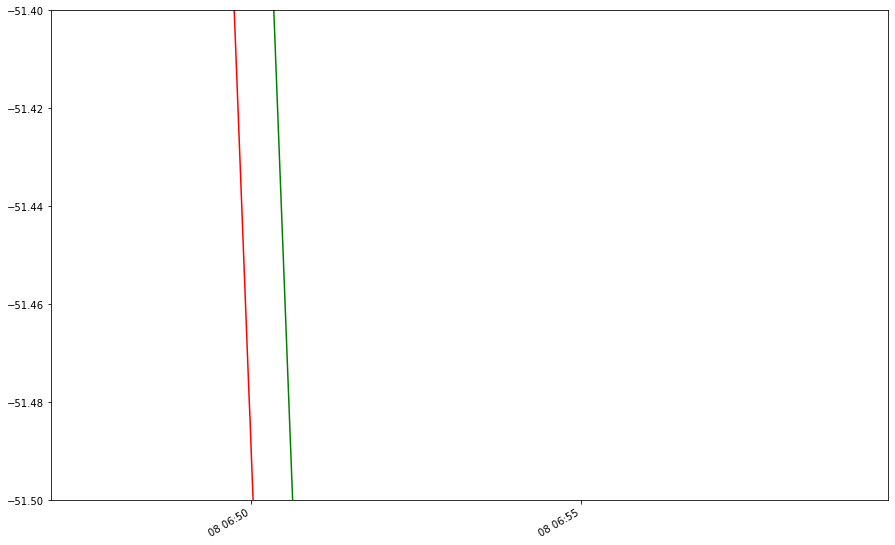

In [29]:
#plt.plot(azel_encoder.azimuthCalculatedAngle)
fig, ax = plt.subplots(figsize=(15,10))
# Azimuth axis
ax1 = azel_encoder['azimuthCalculatedAngle1'].plot(color='red', label='azimuth')
ax2 = azel['azimuth'].plot(color='green', label='azimuth')
ax.set_ylim(-51.5,-51.4)

In [39]:
df = await client.select_time_series('lsst.sal.ATPtg.mount_positions', 'ra99', start, end)
print(df)

200: SELECT ra99 FROM "efd"."autogen"."lsst.sal.ATPtg.mount_positions" WHERE time >= '2021-09-08T06:47:33.263Z' AND time <= '2021-09-08T06:58:28.327Z'
Empty DataFrame
Columns: []
Index: []


update_title_pos
Assigning font /b'F1' = '/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
update_title_pos
Embedding font /opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


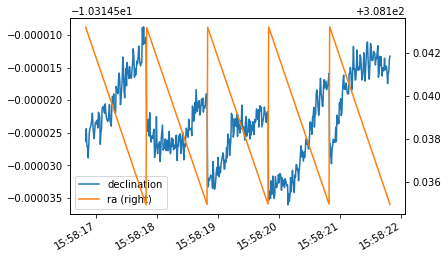

target python read queue is filling: 17 of 100 elements


In [27]:
dec['declination'].plot(legend=True)
ra['ra'].plot(legend=True, secondary_y=True)
plt.savefig("/home/craiglagegit/DATA/RA_Dec_Trends_11Feb21.pdf")

In [28]:
az = merge_packed_time_series(mount_position, 'azimuthCalculatedAngle', stride=1)
el = merge_packed_time_series(mount_position, 'elevationCalculatedAngle', stride=1)

update_title_pos
Assigning font /b'F1' = '/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
update_title_pos
Embedding font /opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


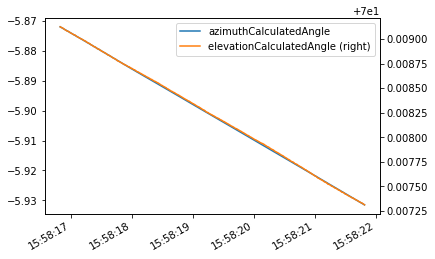

target python read queue is filling: 11 of 100 elements


In [29]:
az['azimuthCalculatedAngle'].plot(legend=True)
el['elevationCalculatedAngle'].plot(legend=True, secondary_y=True)
plt.savefig("/home/craiglagegit/DATA/Az_El_Trends_11Feb21.pdf")

In [33]:
len(dec_vals)

500

In [52]:
dec_time_vals = np.array(dec.values.tolist())[:,1]
ra_time_vals = np.array(ra.values.tolist())[:,1]

update_title_pos
update_title_pos
update_title_pos
update_title_pos


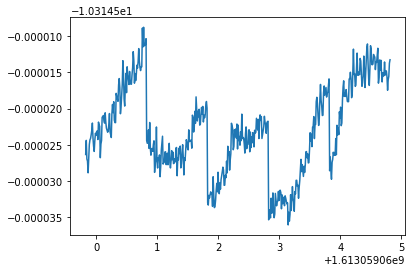

In [36]:
plt.plot(dec_time_vals, dec_vals)

update_title_pos
update_title_pos
update_title_pos
update_title_pos


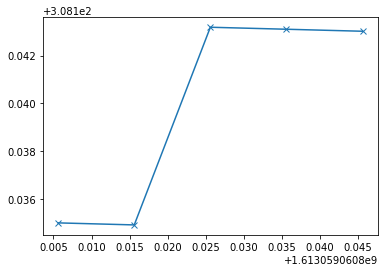

In [53]:
plt.plot(ra_time_vals[98:103], ra_vals[98:103], marker='x')

In [54]:
ra_vals[98:103]

array([308.13499934, 308.13491427, 308.14318803, 308.14310433,
       308.14302026])

In [50]:
new_dec_vals = np.zeros([500])
new_ra_vals = np.zeros([500])
for i in range(5):
    for j in range(100):
        index = i * 100 + j
        new_index = i * 100 + (99 - j)
        if i % 2 == 0:
            new_dec_vals[index] = dec_vals[new_index]
            new_ra_vals[index] = ra_vals[new_index]
        else:
            new_dec_vals[index] = dec_vals[index]
            new_ra_vals[index] = ra_vals[index]

    

update_title_pos
Assigning font /b'F1' = '/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
update_title_pos
Embedding font /opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
Writing TrueType font.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


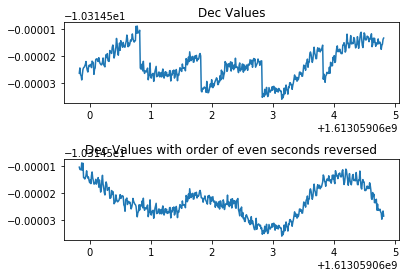

target python read queue is filling: 10 of 100 elements


In [65]:
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.7)
plt.title("Dec Values")
plt.plot(dec_time_vals, dec_vals)
plt.subplot(2,1,2)
plt.title("Dec Values with order of even seconds reversed")
plt.plot(dec_time_vals, new_dec_vals)
plt.savefig("/home/craiglagegit/DATA/Dec_Reversal_11Feb21.pdf")

update_title_pos
update_title_pos
update_title_pos
update_title_pos


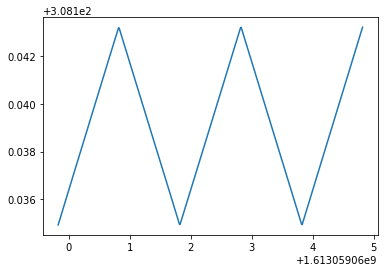

In [51]:
plt.plot(dec_time_vals, new_ra_vals)

In [56]:
t1 = Time('2021-02-11T15:58:18.533', scale='tai')
t2 = t1 + TimeDelta(1, format='sec', scale='tai')
df = await client.select_time_series('lsst.sal.ATPtg.mount_positions', '*', t1, t2)


200: SELECT * FROM "efd"."autogen"."lsst.sal.ATPtg.mount_positions" WHERE time >= '2021-02-11T15:58:18.533Z' AND time <= '2021-02-11T15:58:19.533Z'


In [61]:
print(df['ra99'],df['ra0'])

2021-02-11 15:58:18.587000+00:00    308.134914
Name: ra99, dtype: float64 2021-02-11 15:58:18.587000+00:00    308.143204
Name: ra0, dtype: float64


In [ ]:
# Now check to see if the specs are met:
Aux_Tel_Smslew_AcqTime = 10.0
if max(times) < Aux_Tel_Smslew_AcqTime:
    print(f"Aux_Tel_Smslew_AcqTime passed.  Spec = {Aux_Tel_Smslew_AcqTime}.\
    Measured = {max(times)} ")
else:
    print(f"Aux_Tel_Smslew_AcqTime failed!  Spec = {Aux_Tel_Smslew_AcqTime}.\
    Measured = {max(times)} ")

Aux_Tel_Sm_Slew_Abs_Pointing = 2.5
worst_case = max(ra_accuracies + dec_accuracies)
if worst_case < Aux_Tel_Sm_Slew_Abs_Pointing:
    print(f"Aux_Tel_Sm_Slew_Abs_Pointing passed.  Spec = {Aux_Tel_Sm_Slew_Abs_Pointing}. \
    Measured = {worst_case} ")
else:
    print(f"Aux_Tel_Sm_Slew_Abs_Pointing failed!  Spec = {Aux_Tel_Sm_Slew_Abs_Pointing}. \
    Measured = {worst_case} ")
